In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn

import json

In [42]:
#Data Set Option 1: csv file

# File to Load 
file_to_load = "XAU_USD2000_2020.csv"

gold_df = pd.read_csv(file_to_load)

#Data Cleanup 
gold_df["Date"] = pd.to_datetime(gold_df['Date']) 
gold_df = gold_df.replace(',','', regex=True)
gold_df = gold_df[["Date", "Price", "Open", "High", "Low", 'Change %']]
gold_df = gold_df.rename(columns = {"Price": "Close"})
gold_df['Close'] = gold_df['Close'].astype('float') 
gold_df['Change %'] = gold_df['Change %'].str.rstrip('%').astype('float') 

gold_df

,Date,Close,Open,High,Low,Change %
0,2020-08-14,1943.76,1953.70,1962.84,1932.65,-0.48
1,2020-08-13,1953.03,1920.90,1966.43,1912.93,1.84
2,2020-08-12,1917.82,1912.00,1949.45,1864.30,0.34
3,2020-08-11,1911.25,2027.34,2032.19,1901.69,-5.72
4,2020-08-10,2027.26,2034.19,2050.01,2019.41,-0.36
...,...,...,...,...,...,...
5364,2000-01-07,281.75,281.15,281.75,281.75,0.18
5365,2000-01-06,281.23,280.12,281.23,281.23,0.08
5366,2000-01-05,281.00,281.5,281,281,-0.51
5367,2000-01-04,282.45,288.75,282.45,282.45,-2.27


In [43]:
#Data Set Option 1: csv file

# File to Load 
file_to_load2 = "SPYHistorical2000_2020.csv"

spy_df = pd.read_csv(file_to_load2)

spy_df["Date"] = pd.to_datetime(spy_df['Date']) 
spy_df = spy_df.replace(',','', regex=True)
spy_df['Daily_Change'] = spy_df['Price'].astype(float) - spy_df['Open'].astype(float)
spy_df['Daily_Change']
spy_df = spy_df[["Date", "Price", "Open", "High", "Low", 'Change %', 'Daily_Change']]
new_spy = spy_df.rename(columns = {"Price": "Close"})
new_spy

,Date,Close,Open,High,Low,Change %,Daily_Change
0,2020-08-14,336.84,336.41,337.42,335.62,0.00%,0.43
1,2020-08-13,336.83,337.02,338.25,335.85,-0.18%,-0.19
2,2020-08-12,337.44,335.56,338.28,335.56,1.39%,1.88
3,2020-08-11,332.80,336.95,337.52,332.05,-0.83%,-4.15
4,2020-08-10,335.57,335.05,335.76,332.98,0.30%,0.52
...,...,...,...,...,...,...,...
5199,2000-01-07,145.75,140.31,145.75,140.06,5.81%,5.44
5200,2000-01-06,137.75,139.62,141.50,137.75,-1.61%,-1.87
5201,2000-01-05,140.00,139.94,141.53,137.25,0.18%,0.06
5202,2000-01-04,139.75,143.53,144.06,139.64,-3.91%,-3.78


In [44]:
#Gold data loop through to see After-market-Change rate
gold_change = gold_df[["Date","Change %","Close"]]
gold_change["DailyAfterMarketChange"] = ""

yest_gold = 1
gold_change = gold_change.sort_values(by='Date', ascending=True)

change_gold = 0
loopCnt = 0

for ind in gold_change.index:
    if loopCnt > 0 :
        change_gold = ((gold_change['Close'][ind] - yest_gold)) 
    else:
        change_gold = 0
        loopCnt = loopCnt + 1
        
    #gold_change["DailyAfterMarketChange"][ind] = change_gold
    yest_gold = gold_change['Close'][ind] 
    gold_change.loc[ind,"DailyAfterMarketChange"] = change_gold


#New column Year for 'Yearly charts'
gold_change['year'] = pd.DatetimeIndex(gold_change['Date']).year

gold_change


/Users/bd/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Change %,Close,DailyAfterMarketChange,year
5368,2000-01-03,0.26,289.00,0,2000
5367,2000-01-04,-2.27,282.45,-6.55,2000
5366,2000-01-05,-0.51,281.00,-1.45,2000
5365,2000-01-06,0.08,281.23,0.23,2000
5364,2000-01-07,0.18,281.75,0.52,2000
...,...,...,...,...,...
4,2020-08-10,-0.36,2027.26,-7.36,2020
3,2020-08-11,-5.72,1911.25,-116.01,2020
2,2020-08-12,0.34,1917.82,6.57,2020
1,2020-08-13,1.84,1953.03,35.21,2020


In [45]:
#Gold YEARly Change %
gold_yearly_change_df = pd.DataFrame(gold_change.groupby("year")[["DailyAfterMarketChange"]].sum())
gold_yearly_change_df = gold_yearly_change_df.reset_index()
# print(gold_yearly_change_df)
# total_gold_percent = round(gold_yearly_change_df["DailyAfterMarketChange"].sum(),2)
# print(f"The total change % for Gold from 2000 to 2020 is : {total_gold_percent}")
# gold_yearly = pd.DataFrame()
# gold_yearly["year"] = ""
# gold_yearly["perc"] = ""


year1 = []
perc1 = []
for ind in gold_yearly_change_df.year.unique():
    first_yr = gold_change.loc[gold_change["year"]==ind]
    first_yr = first_yr.iloc[[0, -1]]
    first = first_yr.iloc[0]['Close']
    last = first_yr.iloc[-1]['Close']
    perc = round((last-first)/first*100,2)
    
    year1.append(ind)
    perc1.append(perc)

gold_yearly = pd.DataFrame({"Year":year1, "Perc":perc1}) 
gold_yearly

,Year,Perc
0,2000,-5.74
1,2001,3.76
2,2002,24.44
3,2003,20.09
4,2004,5.62
5,2005,20.67
6,2006,19.34
7,2007,30.15
8,2008,5.58
9,2009,24.26


In [56]:
gold_yearly['Positive_Growth'] = gold_yearly['Perc'] > 0
gold_yearly

,Year,Perc,Positive Growth,Positive_Growth
0,2000,-5.74,False,False
1,2001,3.76,True,True
2,2002,24.44,True,True
3,2003,20.09,True,True
4,2004,5.62,True,True
5,2005,20.67,True,True
6,2006,19.34,True,True
7,2007,30.15,True,True
8,2008,5.58,True,True
9,2009,24.26,True,True


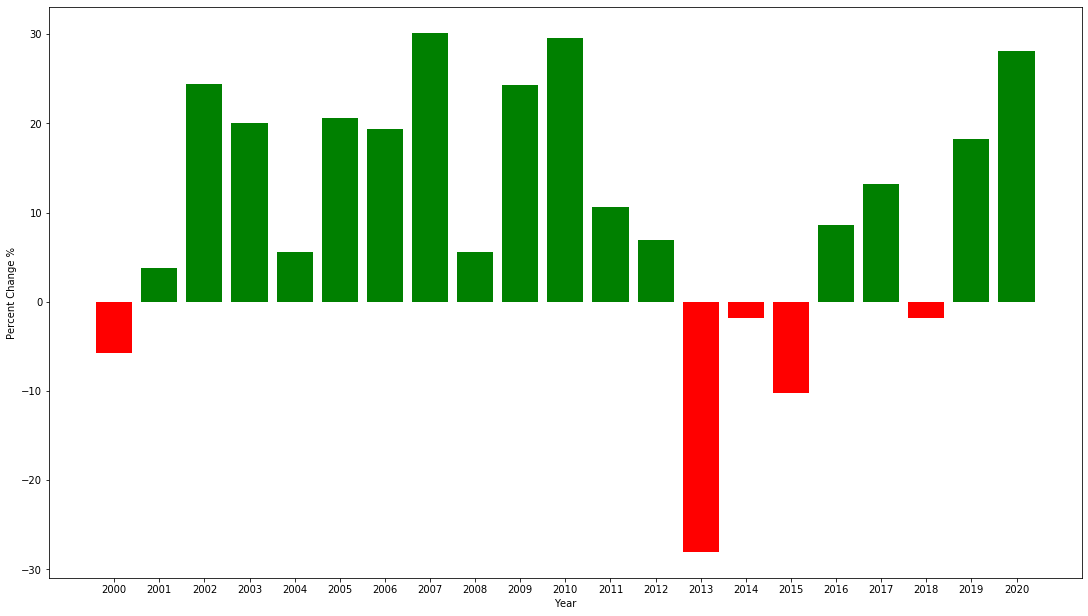

In [89]:
labels = gold_yearly['Year']
yearly_data = gold_yearly['Perc']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
gold = ax.bar(x, yearly_data, color = gold_yearly.Positive_Growth.map({True: 'g', False: 'r'}))


ax.set_ylabel('Percent Change %')
ax.set_xlabel('Year')


ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.set_size_inches(18.5, 10.5)

In [92]:
#S&P data loop through to see After-market-Change rate
sp_change = new_spy[["Date","Change %","Close"]]
sp_change["DailyAfterMarketChange"] = ""

yest_sp = 1
sp_change = sp_change.sort_values(by='Date', ascending=True)

change_sp = 0
loopCnt = 0
for ind in sp_change.index:
    if loopCnt > 0 :
        change_sp = ((sp_change['Close'][ind] - yest_sp)) 
    else:
        change_sp = 0
        loopCnt = loopCnt + 1
        
    #sp_change["DailyAfterMarketChange"][ind] = change_sp
    sp_change.loc[ind,"DailyAfterMarketChange"] = change_sp
    yest_sp = sp_change['Close'][ind]        

    
#New column Year for 'Yearly charts'
sp_change['year'] = pd.DatetimeIndex(sp_change['Date']).year


sp_change

/Users/bd/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Change %,Close,DailyAfterMarketChange,year
5203,2000-01-03,-0.98%,145.44,0,2000
5202,2000-01-04,-3.91%,139.75,-5.69,2000
5201,2000-01-05,0.18%,140.00,0.25,2000
5200,2000-01-06,-1.61%,137.75,-2.25,2000
5199,2000-01-07,5.81%,145.75,8,2000
...,...,...,...,...,...
4,2020-08-10,0.30%,335.57,1,2020
3,2020-08-11,-0.83%,332.80,-2.77,2020
2,2020-08-12,1.39%,337.44,4.64,2020
1,2020-08-13,-0.18%,336.83,-0.61,2020


In [93]:
#S&P YEARly Change %
sp_yearly_change_df = pd.DataFrame(sp_change.groupby("year")[["DailyAfterMarketChange"]].sum())
sp_yearly_change_df = sp_yearly_change_df.reset_index()
# total_sp_percent = round(sp_yearly_change_df["DailyAfterMarketChange"].sum(),2)
# print(f"The total change % for S&P from 2000 to 2020 is : {total_sp_percent}")
# sp_yearly_change_df


year1 = []
perc1 = []

for ind in sp_yearly_change_df.year.unique():
    first_yr = sp_change.loc[sp_change["year"]==ind]
    first_yr = first_yr.iloc[[0, -1]]
    first = first_yr.iloc[0]['Close']
    last = first_yr.iloc[-1]['Close']
    perc = round((last-first)/first*100,2)
    
    year1.append(ind)
    perc1.append(perc)


sp_yearly = pd.DataFrame({"Year":year1, "Perc":perc1}) 
sp_yearly

,Year,Perc
0,2000,-9.80
1,2001,-11.26
2,2002,-23.63
3,2003,22.19
4,2004,8.67
5,2005,3.50
6,2006,11.78
7,2007,3.42
8,2008,-37.74
9,2009,19.88


In [94]:
sp_yearly['Positive_Growth'] = sp_yearly['Perc'] > 0
sp_yearly

,Year,Perc,Positive_Growth
0,2000,-9.80,False
1,2001,-11.26,False
2,2002,-23.63,False
3,2003,22.19,True
4,2004,8.67,True
5,2005,3.50,True
6,2006,11.78,True
7,2007,3.42,True
8,2008,-37.74,False
9,2009,19.88,True


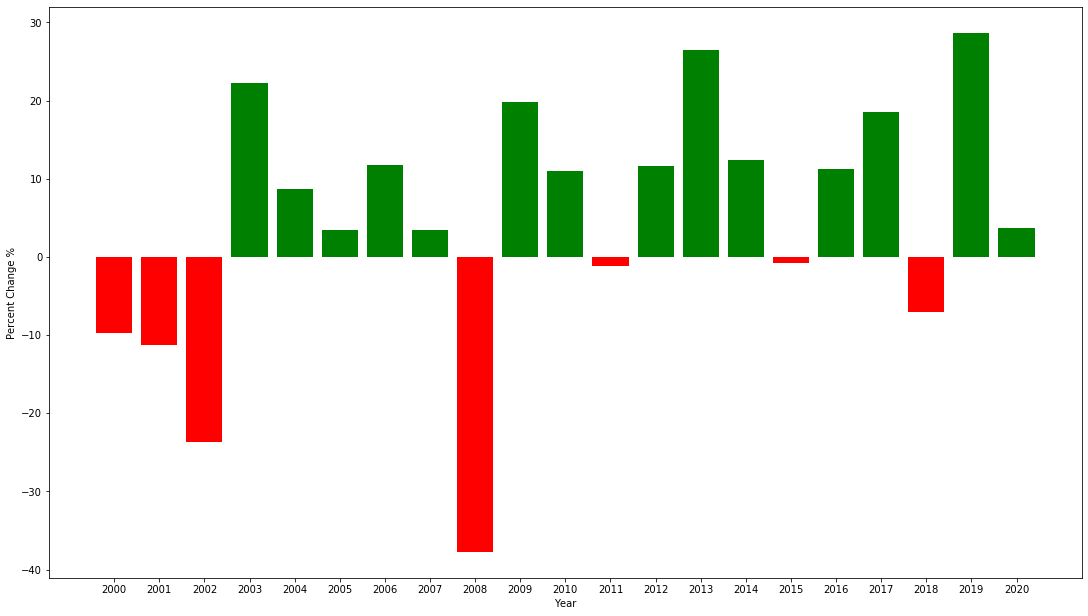

In [95]:
labels = sp_yearly['Year']
yearly_data = sp_yearly['Perc']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
gold = ax.bar(x, yearly_data, color = sp_yearly.Positive_Growth.map({True: 'g', False: 'r'}))


ax.set_ylabel('Percent Change %')
ax.set_xlabel('Year')


ax.set_xticks(x)
ax.set_xticklabels(labels)
fig.set_size_inches(18.5, 10.5)

In [14]:
gold_df["Date"] = pd.to_datetime(gold_df['Date']) 


In [15]:
gold_df = gold_df.replace(',','', regex=True)

In [16]:
gold_df['Daily_Change'] = gold_df['Price'].astype(float) - gold_df['Open'].astype(float)

In [17]:
gold_df['Daily_Change']

0        -9.94
1        32.13
2         5.82
3      -116.09
4        -6.93
         ...  
5364      0.60
5365      1.11
5366     -0.50
5367     -6.30
5368      0.50
Name: Daily_Change, Length: 5369, dtype: float64

In [18]:
gold_df = gold_df[["Date", "Price", "Open", "High", "Low", 'Change %', 'Daily_Change']]

In [19]:
new_gold = gold_df.rename(columns = {"Price": "Close"})

In [20]:
new_gold 

,Date,Close,Open,High,Low,Change %,Daily_Change
0,2020-08-14,1943.76,1953.70,1962.84,1932.65,-0.48%,-9.94
1,2020-08-13,1953.03,1920.90,1966.43,1912.93,1.84%,32.13
2,2020-08-12,1917.82,1912.00,1949.45,1864.30,0.34%,5.82
3,2020-08-11,1911.25,2027.34,2032.19,1901.69,-5.72%,-116.09
4,2020-08-10,2027.26,2034.19,2050.01,2019.41,-0.36%,-6.93
...,...,...,...,...,...,...,...
5364,2000-01-07,281.75,281.15,281.75,281.75,0.18%,0.60
5365,2000-01-06,281.23,280.12,281.23,281.23,0.08%,1.11
5366,2000-01-05,281,281.5,281,281,-0.51%,-0.50
5367,2000-01-04,282.45,288.75,282.45,282.45,-2.27%,-6.30


In [21]:
gold_change = new_gold[['Date', 'Change %']]

In [22]:
gold_change.dtypes

Date        datetime64[ns]
Change %            object
dtype: object

In [23]:
gold_change

,Date,Change %
0,2020-08-14,-0.48%
1,2020-08-13,1.84%
2,2020-08-12,0.34%
3,2020-08-11,-5.72%
4,2020-08-10,-0.36%
...,...,...
5364,2000-01-07,0.18%
5365,2000-01-06,0.08%
5366,2000-01-05,-0.51%
5367,2000-01-04,-2.27%


In [32]:

new_gold['year'] = pd.DatetimeIndex(gold_change['Date']).year



In [40]:
new_gold

,Date,Close,Open,High,Low,Change %,Daily_Change,year
0,2020-08-14,1943.76,1953.70,1962.84,1932.65,-0.48%,-9.94,2020
1,2020-08-13,1953.03,1920.90,1966.43,1912.93,1.84%,32.13,2020
2,2020-08-12,1917.82,1912.00,1949.45,1864.30,0.34%,5.82,2020
3,2020-08-11,1911.25,2027.34,2032.19,1901.69,-5.72%,-116.09,2020
4,2020-08-10,2027.26,2034.19,2050.01,2019.41,-0.36%,-6.93,2020
...,...,...,...,...,...,...,...,...
5364,2000-01-07,281.75,281.15,281.75,281.75,0.18%,0.60,2000
5365,2000-01-06,281.23,280.12,281.23,281.23,0.08%,1.11,2000
5366,2000-01-05,281,281.5,281,281,-0.51%,-0.50,2000
5367,2000-01-04,282.45,288.75,282.45,282.45,-2.27%,-6.30,2000


In [41]:

#Gold data loop through to see After-market-Change rate
gold_change = new_gold[["Date","Change %","Close"]]
gold_change["DailyAfterMarketChange"] = ""

yest_gold = 1
gold_change = gold_change.sort_values(by='Date', ascending=True)

change_gold = 0
loopCnt = 0

for ind in gold_change.index:
    if loopCnt > 0 :
        change_gold = ((gold_change['Close'][ind] - yest_gold)) 
    else:
        change_gold = 0
        loopCnt = loopCnt + 1
        
    #gold_change["DailyAfterMarketChange"][ind] = change_gold
    yest_gold = gold_change['Close'][ind] 
    gold_change.loc[ind,"DailyAfterMarketChange"] = change_gold


#New column Year for 'Yearly charts'
gold_change['year'] = pd.DatetimeIndex(gold_change['Date']).year

gold_change

/Users/bd/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [35]:

year1 = []
perc1 = []
for ind in new_gold:
    first_yr = new_gold.loc[new_gold["year"]==ind]
    first_yr = first_yr.iloc[[0, -1]]
    first = first_yr.iloc[0]['Close']
    last = first_yr.iloc[-1]['Close']
    perc = round((last-first)/first*100,2)
    
    year1.append(ind)
    perc1.append(perc)

gold_yearly = pd.DataFrame({"Year":year1, "Perc":perc1}) 
gold_yearly

IndexError: positional indexers are out-of-bounds

In [36]:
new_gold

,Date,Close,Open,High,Low,Change %,Daily_Change,year
0,2020-08-14,1943.76,1953.70,1962.84,1932.65,-0.48%,-9.94,2020
1,2020-08-13,1953.03,1920.90,1966.43,1912.93,1.84%,32.13,2020
2,2020-08-12,1917.82,1912.00,1949.45,1864.30,0.34%,5.82,2020
3,2020-08-11,1911.25,2027.34,2032.19,1901.69,-5.72%,-116.09,2020
4,2020-08-10,2027.26,2034.19,2050.01,2019.41,-0.36%,-6.93,2020
...,...,...,...,...,...,...,...,...
5364,2000-01-07,281.75,281.15,281.75,281.75,0.18%,0.60,2000
5365,2000-01-06,281.23,280.12,281.23,281.23,0.08%,1.11,2000
5366,2000-01-05,281,281.5,281,281,-0.51%,-0.50,2000
5367,2000-01-04,282.45,288.75,282.45,282.45,-2.27%,-6.30,2000


In [86]:
best_gold = new_gold.sort_values('Change %', axis = 0, ascending=False, inplace=False, kind = 'quicksort', na_position = 'last')

In [87]:
best_gold.head()

,Date,Close,Open,High,Low,Change %,Daily_Change
5344,2000-02-04,315.2,287.75,315.2,315.2,9.67%,27.45
3055,2008-11-21,800,744.6,802.2,743.9,7.15%,55.40
4928,2001-09-11,288.5,273.65,288.5,288.5,6.16%,14.85
3068,2008-11-04,765.4,724,768.7,722.6,5.88%,41.40
3010,2009-01-23,899.4,856.6,903.5,852.8,4.88%,42.80


In [273]:
worst_gold = new_gold.sort_values('Daily_Change', axis = 0, ascending=True, inplace=False, 
                                  kind = 'quicksort')

In [274]:
worst_gold.head(10)

,Date,Close,Open,High,Low,Change %,Daily_Change
1910,2013-04-15,1353.25,1478.30,1495.66,1336.54,-8.49%,-125.05
3,2020-08-11,1911.25,2027.34,2032.19,1901.69,-5.72%,-116.09
2202,2012-02-29,1695.20,1784.59,1790.80,1688.49,-5.08%,-89.39
1911,2013-04-12,1478.85,1560.69,1564.86,1477.50,-5.28%,-81.84
2315,2011-09-23,1656.59,1737.63,1756.01,1629.99,-4.56%,-81.04
2337,2011-08-24,1751.05,1830.05,1854.11,1749.89,-4.32%,-79.00
1862,2013-06-20,1278.00,1351.51,1348.52,1276.80,-5.42%,-73.51
2338,2011-08-23,1830.15,1897.84,1911.96,1823.50,-3.58%,-67.69
3085,2008-10-10,851.4,914.6,935,827.5,-6.80%,-63.20
111,2020-03-12,1577.08,1634.80,1650.47,1561.01,-3.54%,-57.72


In [92]:
best_spy = new_spy.sort_values('Change %', axis = 0, ascending=False, inplace=False, kind = 'quicksort', na_position = 'last')

In [93]:
best_spy.head()

,Date,Close,Open,High,Low,Change %,Daily_Change
113,2020-03-24,243.15,234.42,244.10,233.80,9.06%,8.73
122,2020-03-13,269.32,263.09,271.48,248.52,8.55%,6.23
2886,2009-03-23,82.22,78.74,82.29,78.31,7.18%,3.48
2966,2008-11-24,85.03,81.92,86.98,80.36,6.93%,3.11
103,2020-04-06,264.86,257.84,267.00,248.17,6.72%,7.02


In [96]:
worst_spy = new_spy.sort_values('Daily_Change', axis = 0, ascending=True, inplace=False, kind = 'quicksort', na_position = 'last')

In [97]:
worst_spy.head()

,Date,Close,Open,High,Low,Change %,Daily_Change
116,2020-03-20,228.80,242.53,244.47,228.50,-4.87%,-13.73
135,2020-02-25,312.65,323.94,324.61,311.69,-3.03%,-11.29
649,2018-02-08,257.63,268.01,268.17,257.59,-3.75%,-10.38
54,2020-06-11,300.61,310.95,312.03,300.04,-5.76%,-10.34
652,2018-02-05,263.93,273.45,275.85,263.31,-4.18%,-9.52


In [88]:
greatest_change = new_gold.loc[new_gold['Change %'] >= '4.00%']

In [89]:
greatest_change

,Date,Close,Open,High,Low,Change %
103,2020-03-24,"1,622.03","1,553.71","1,638.72","1,553.41",4.39%
1077,2016-06-24,"1,315.98","1,253.86","1,358.70","1,251.66",4.80%
1173,2016-02-11,"1,246.89","1,197.44","1,260.98","1,196.21",4.13%
1798,2013-09-18,"1,365.15","1,309.70","1,367.77","1,291.95",4.24%
2135,2012-06-01,"1,626.25","1,560.45","1,630.02","1,545.30",4.20%
3010,2009-01-23,899.4,856.6,903.5,852.8,4.88%
3042,2008-12-10,808.75,776.35,814.1,774.65,4.14%
3055,2008-11-21,800,744.6,802.2,743.9,7.15%
3068,2008-11-04,765.4,724,768.7,722.6,5.88%
4928,2001-09-11,288.5,273.65,288.5,288.5,6.16%


0       1,943.76
1       1,953.03
2       1,917.82
3       1,911.25
4       2,027.26
          ...   
5364      281.75
5365      281.23
5366         281
5367      282.45
5368         289
Name: Close, Length: 5369, dtype: object